In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [52]:
df = pd.read_csv("Housing Price data set.csv")
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,546.000000,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
df.dtypes

Unnamed: 0      int64
price         float64
lotsize         int64
bedrooms        int64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object

# Removing Catogorical features

In [5]:
data = df.loc[:, ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
price = df.loc[:, ['price']]

In [6]:
data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,5850,3,1,2,1
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0


# Normalising

In [7]:
mean = data.mean()
std  = data.std()
normalized_data = (data - mean) / std

In [8]:
std

lotsize     2168.158725
bedrooms       0.737388
bathrms        0.502158
stories        0.868203
garagepl       0.861307
dtype: float64

In [10]:
mean

lotsize     5150.265568
bedrooms       2.965201
bathrms        1.285714
stories        1.807692
garagepl       0.692308
dtype: float64

In [11]:
normalized_data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [12]:
normalized_data['bias'] = np.ones(normalized_data.shape[0])
x = normalized_data.loc[:,['bias', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]

In [13]:
x

,bias,lotsize,bedrooms,bathrms,stories,garagepl
0,1.0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,1.0,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,1.0,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,1.0,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,1.0,0.557955,-1.308947,-0.568973,-0.930304,-0.803788
5,1.0,-0.456731,0.047192,-0.568973,-0.930304,-0.803788
6,1.0,-0.585873,0.047192,1.422433,0.221501,1.518266
7,1.0,-0.456731,0.047192,-0.568973,1.373306,-0.803788
8,1.0,-0.161550,0.047192,-0.568973,-0.930304,-0.803788
9,1.0,0.161305,0.047192,1.422433,2.525111,0.357239


In [17]:
x1 = np.array(x.loc[0,:])

In [18]:
w = np.zeros((x.shape[1], 1))

In [19]:
def cost(x1, x, y, w,t = 1):
    m = len(y)
    e = (np.dot(x, w) - y) ** 2
    tau = np.array(np.exp(-1 * np.sum(((x - x1) **2), axis = 1)/(2 * t))).reshape(-1,1)
    
    return np.sum(np.multiply(tau,e))   

In [20]:
alpha = 0.001
iterations = 10000
y = price
lamb = 500
cost(x1, x, y, w)

price    3.905313e+11
dtype: float64

In [21]:
def gradient_descend(x, y, alpha, x1, iterations, t = 1):
    cost_list = []
    w = np.zeros((x.shape[1],1))

    for i in range(iterations):
        tau = np.array(np.exp(-1 * np.sum(((x - x1) **2), axis = 1)/(2 * t)  )).reshape(-1,1)
        grade = (np.dot(x.T, np.multiply(np.dot(x,w) - y, tau)) ) 
        w = w - alpha * grade
        cost_list.append(cost(x1, x, y, w, t))
    return cost_list, w
    

price    2.354951e+10
dtype: float64
[[69599.09045111]
 [12349.32497916]
 [ 3168.63693338]
 [ 8614.83380576]
 [ 5467.62061051]
 [ 4737.86756509]]
71736.17343861755 price    42000.0
Name: 0, dtype: float64


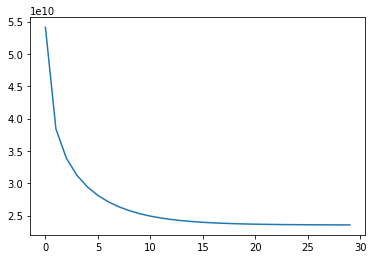

In [32]:
cost_list, w = gradient_descend(x, y, alpha=0.01, x1=x1, iterations=30)
plt.plot(cost_list)
print(cost_list[-1])
print(w)
print(np.matmul(x1,w)[0], y.iloc[0])

price    163.047828
dtype: float64
[[ 26131.03791925]
 [  8433.32490982]
 [  1233.16613639]
 [-14867.85616326]
 [  5788.05013326]
 [  9335.02635043]]
41987.24145850654 price    42000.0
Name: 0, dtype: float64


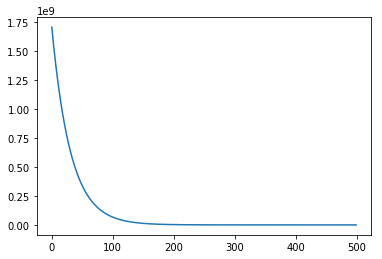

In [38]:
cost_list, w = gradient_descend(x, y, alpha=0.01, x1=x1, iterations=500, t = 1/10000)
plt.plot(cost_list)
print(cost_list[-1])
print(w)
print(np.matmul(x1,w)[0], y.iloc[0])

In [81]:
def avg_error(x, y, w):
    e = np.abs(np.dot(1/y.T,(np.dot(x, w) - y)))
    return (e)[0][0] * 100 / len(y)

In [82]:
avg_error(x, y, w)

60.00985895589754

In [39]:
testx = x[383:]
testy = price[383:]
X = x[:383]
Y = price[:383]

83495.59130986525 74700.0
75218.13710091775 78000.0
70374.4309256791 78900.0
3.322126460888278e-36 83900.0
83063.94100891755 85000.0
77778.80050294036 85000.0
64431.93370470707 86000.0
0.008627647914447959 86900.0
8.351010257337743e-35 94500.0
74797.47053731873 96000.0
8.815776242084097e-07 106000.0
84341.59041667 72000.0
4951.699390236001 74500.0
129294.91988907788 77000.0
116243.69743476369 80750.0
82930.69050221669 82900.0
61167.15077219491 85000.0
84260.3382271062 92500.0
67431.79926392034 76000.0
82000.04475702185 77500.0
79011.69324745444 80000.0
5.690344899583308e-06 80000.0
86527.27250301889 86000.0
78375.20461600255 87000.0
79245.06796171787 87500.0
77574.10554401312 89000.0
93191.49484125679 89900.0
122256.28613482628 90000.0
92535.46758138406 95000.0
2.1004164593806543e-22 112000.0
46754.83993751298 31900.0
73845.65983263717 52000.0
99766.45264152781 90000.0
1069.108944625608 100000.0
85769.83876099011 91700.0
3.544718482183356e-27 174500.0
54141.5888992963 94700.0
33.704590

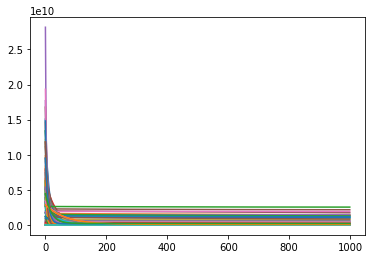

In [54]:
for i in range(len(testy)):
    cost_list, w = gradient_descend(X, Y, alpha=0.01, x1=testx.iloc[i,:], iterations=500, t = 1/100)
    plt.plot(cost_list)
    #print(cost_list[-1])
    #print(w)
    print(np.matmul(testx.iloc[i,:],w)[0], testy.iloc[i,0])

In [88]:
x1 = testx.iloc[0,:]
x1
t = 1/10

In [120]:
T =  np.exp(np.sum((X - x1) ** 2, axis=1) / (-2 * t * t))
xt = X.T * T
np.linalg.inv(np.matmul(xt, X)) @ xt @ Y

array([[-5.42308592e+05],
       [ 1.29445905e+04],
       [-2.12221141e+07],
       [ 2.31665658e+05],
       [-1.72856092e+06],
       [ 3.57135676e+04]])

In [118]:
a = np.random.rand(8).reshape(-1,)
a

array([0.07264452, 0.47231856, 0.01916564, 0.10117715, 0.33265981,
       0.9355631 , 0.69042   , 0.04490838])

In [119]:
np.ones((8,3)).T * a

array([[0.07264452, 0.47231856, 0.01916564, 0.10117715, 0.33265981,
        0.9355631 , 0.69042   , 0.04490838],
       [0.07264452, 0.47231856, 0.01916564, 0.10117715, 0.33265981,
        0.9355631 , 0.69042   , 0.04490838],
       [0.07264452, 0.47231856, 0.01916564, 0.10117715, 0.33265981,
        0.9355631 , 0.69042   , 0.04490838]])

In [117]:
T.shape

(383,)